In [1]:
from __future__ import division
import numpy as np
import scipy.signal as sg
from scipy.fftpack import rfft, fftfreq
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import matplotlib.colors as colors
from pydub import AudioSegment

import utilities as util

In [2]:
# Load the sound file
fs_bells, wav_bells = wavfile.read('../samples/HandBells.wav')
fs_guitar, wav_guitar = wavfile.read('../samples/Guitar.wav')
fs_piano, wav_piano = wavfile.read('../samples/Piano.wav')
fs_chords, wav_chords = wavfile.read('../samples/Chords.wav')

wav_bells = wav_bells.astype(np.double)
wav_guitar = wav_guitar.astype(np.double)
wav_piano = wav_piano.astype(np.double)
wav_chords = wav_chords.astype(np.double)

freq_bells, time_bells, spectrogram_bells = sg.spectrogram(wav_bells, fs_bells, nperseg=16384)
freq_guitar, time_guitar, spectrogram_guitar = sg.spectrogram(wav_guitar, fs_guitar, nperseg=16384)
freq_piano, time_piano, spectrogram_piano = sg.spectrogram(wav_piano, fs_piano, nperseg=16384)
freq_chords, time_chords, spectrogram_chords = sg.spectrogram(wav_chords, fs_chords, nperseg=16384)

In [3]:
argsort_bells  = np.argsort(spectrogram_bells,  axis=0)
argsort_guitar = np.argsort(spectrogram_guitar, axis=0)
argsort_piano  = np.argsort(spectrogram_piano,  axis=0)
argsort_chords = np.argsort(spectrogram_chords, axis=0)

In [4]:
corr_bells,  nf_bells  = util.make_corrections(spectrogram_bells,  freq_bells)
corr_guitar, nf_guitar = util.make_corrections(spectrogram_guitar, freq_guitar)
corr_piano,  nf_piano  = util.make_corrections(spectrogram_piano,  freq_piano)
corr_chords, nf_chords = util.make_corrections(spectrogram_chords, freq_chords)

In [5]:
argsort_bells2  = np.argsort(corr_bells,  axis=0)
argsort_guitar2 = np.argsort(corr_guitar, axis=0)
argsort_piano2  = np.argsort(corr_piano,  axis=0)
argsort_chords2 = np.argsort(corr_chords, axis=0)

Text(0,0.5,'Ratio (Inverted)')

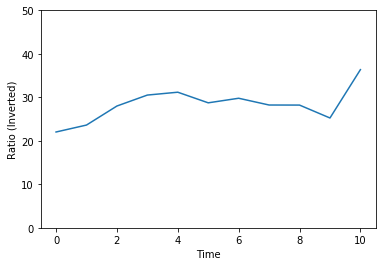

In [6]:
plt.plot(corr_guitar.max(axis=0)[1:-2] / [corr_guitar[x,i] for i,x in enumerate(argsort_guitar2[-2][1:-2], 1)])
plt.ylim(0, 50)
plt.xlabel('Time')
plt.ylabel('Ratio (Inverted)')

In [7]:
corr_guitar.max(axis=0)

array([2.62764766e+04, 4.08078264e+08, 4.39822040e+08, 4.01310065e+08,
       3.86589588e+08, 3.76605060e+08, 3.78284315e+08, 3.77915937e+08,
       3.82002909e+08, 3.73749021e+08, 3.85769926e+08, 1.48322864e+08,
       4.89430875e+04, 1.60411672e+04])

In [8]:
corr_guitar.max(axis=0)

array([2.62764766e+04, 4.08078264e+08, 4.39822040e+08, 4.01310065e+08,
       3.86589588e+08, 3.76605060e+08, 3.78284315e+08, 3.77915937e+08,
       3.82002909e+08, 3.73749021e+08, 3.85769926e+08, 1.48322864e+08,
       4.89430875e+04, 1.60411672e+04])

Text(0,0.5,'Ratio (Inverted)')

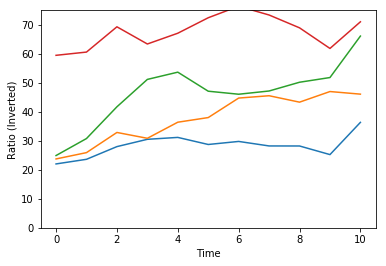

In [9]:
plt.plot(corr_guitar.max(axis=0)[1:-2] / [corr_guitar[x,i] for i,x in enumerate(argsort_guitar2[-2][1:-2], 1)])
plt.plot(corr_guitar.max(axis=0)[1:-2] / [corr_guitar[x,i] for i,x in enumerate(argsort_guitar2[-3][1:-2], 1)])
plt.plot(corr_guitar.max(axis=0)[1:-2] / [corr_guitar[x,i] for i,x in enumerate(argsort_guitar2[-4][1:-2], 1)])
plt.plot(corr_guitar.max(axis=0)[1:-2] / [corr_guitar[x,i] for i,x in enumerate(argsort_guitar2[-5][1:-2], 1)])

plt.ylim(0, 75)
plt.xlabel('Time')
plt.ylabel('Ratio (Inverted)')

Text(0,0.5,'Ratio (Inverted)')

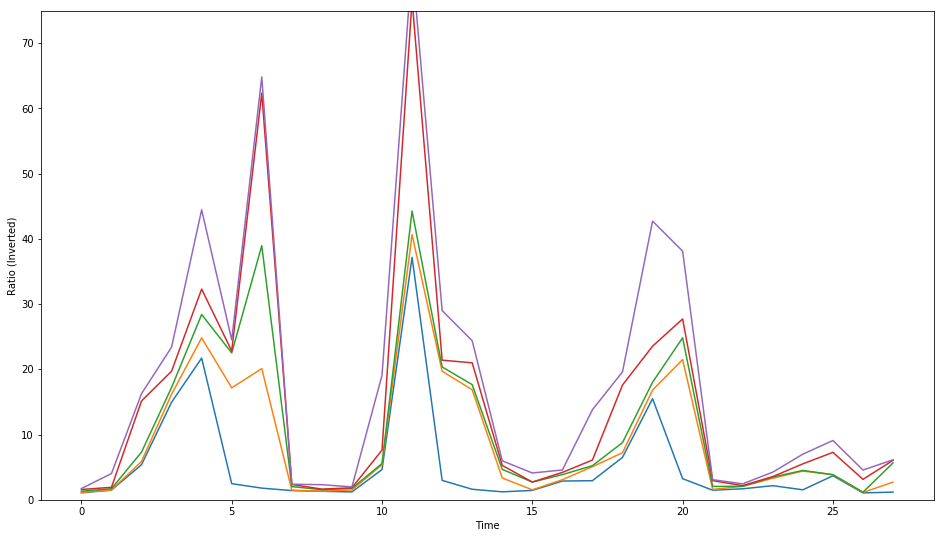

In [10]:
plt.figure(figsize=(16,9))
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-2][1:-2], 1)])
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-3][1:-2], 1)])
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-4][1:-2], 1)])
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-5][1:-2], 1)])
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-6][1:-2], 1)])


plt.ylim(0, 75)
plt.xlabel('Time')
plt.ylabel('Ratio (Inverted)')

In [11]:
corr_piano.max(axis=0) # Max values at each time

array([9.81988473e+08, 1.65228779e+08, 1.24732098e+08, 2.43382304e+08,
       3.26741299e+08, 3.77540231e+08, 1.58253959e+08, 2.45783359e+08,
       7.31947195e+08, 3.18825022e+08, 1.57084843e+08, 2.93582896e+08,
       1.12315200e+09, 3.37863920e+08, 1.79403443e+08, 1.91224742e+08,
       9.52580985e+08, 4.26503201e+08, 4.21764377e+08, 2.76319556e+08,
       3.29825796e+08, 3.63394092e+08, 5.34491677e+08, 5.40433801e+08,
       3.28036293e+08, 3.30107911e+08, 1.14513196e+08, 2.52429276e+06,
       6.25073371e+04, 9.23648552e+02, 1.37361903e+01])

In [12]:
nf_piano.shape

(94,)

In [13]:
nf_piano

array([  17.32391444,   18.35404799,   19.44543648,   20.60172231,
         21.82676446,   23.12465142,   24.49971475,   25.9565436 ,
         27.5       ,   29.13523509,   30.86770633,   32.70319566,
         34.64782887,   36.70809599,   38.89087297,   41.20344461,
         43.65352893,   46.24930284,   48.9994295 ,   51.9130872 ,
         55.        ,   58.27047019,   61.73541266,   65.40639133,
         69.29565774,   73.41619198,   77.78174593,   82.40688923,
         87.30705786,   92.49860568,   97.998859  ,  103.82617439,
        110.        ,  116.54094038,  123.47082531,  130.81278265,
        138.59131549,  146.83238396,  155.56349186,  164.81377846,
        174.61411572,  184.99721136,  195.99771799,  207.65234879,
        220.        ,  233.08188076,  246.94165063,  261.6255653 ,
        277.18263098,  293.66476792,  311.12698372,  329.62755691,
        349.22823143,  369.99442271,  391.99543598,  415.30469758,
        440.        ,  466.16376152,  493.88330126,  523.25113

In [14]:
corr_piano

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.69520801e+04, 1.20431612e+05, 1.79344141e+05, ...,
        1.87626070e+01, 4.58789080e-01, 6.05566575e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [8.42926229e+04, 3.96646579e+05, 3.17881232e+04, ...,
        1.52404244e-01, 9.84909569e-02, 1.52853099e-02],
       [4.82512989e+04, 8.83491405e+03, 2.31621051e+05, ...,
        5.05770475e-02, 9.14574121e-02, 1.28678402e-02],
       [2.07767640e+05, 8.71768074e+03, 5.33584031e+03, ...,
        5.65336853e-02, 8.07288078e-02, 1.27543912e-02]])

In [15]:
argsort_piano2[0,:] # Freq location per time

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
corr_piano[corr_piano[argsort_piano2, 0]>0]

array([0.        , 0.        , 0.        , ..., 0.05653369, 0.08072881,
       0.01275439])

In [17]:
[argsort_piano2]

[array([[ 0,  0,  0, ...,  0,  0,  0],
        [14,  2,  2, ...,  2,  2,  2],
        [ 2,  3,  3, ...,  3,  3,  3],
        ...,
        [42, 39, 39, ..., 40, 40, 54],
        [59, 63, 35, ..., 47, 47, 47],
        [51, 51, 63, ..., 35, 35, 35]])]

Text(0,0.5,'Intensity')

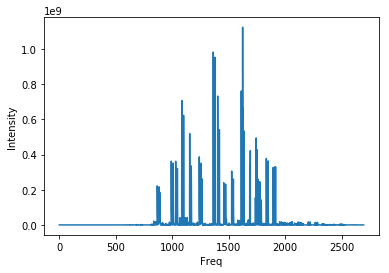

In [18]:
plt.plot(corr_piano[corr_piano[argsort_piano2, 0]>0])
plt.xlabel('Freq')
plt.ylabel('Intensity')

In [19]:
spectrogram_piano.max()

1165080.3743508013

In [20]:
itemindex = np.where(spectrogram_piano==spectrogram_piano.max())

In [21]:
spectrogram_piano[itemindex]

array([1165080.3743508])

In [22]:
freq_piano[itemindex[0]]

array([524.87182617])

In [23]:
freq_piano[itemindex[0]]*2

array([1049.74365234])

In [24]:
itemindex2 = np.where(1049<=spectrogram_piano)
itemindex3 = np.where(spectrogram_piano<=1054)

In [25]:
itemindex4 = np.intersect1d(itemindex2, itemindex3)

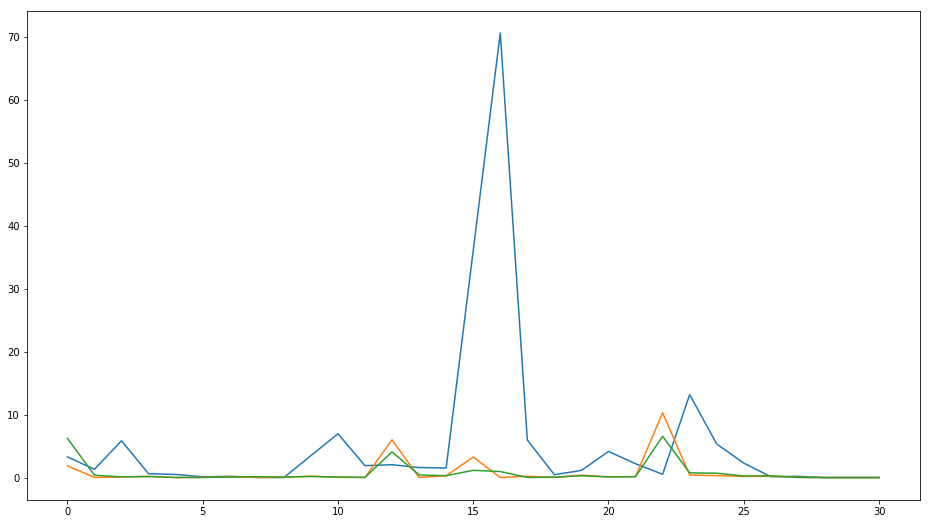

In [26]:
plt.figure(figsize=(16,9))
# plt.plot(spectrogram_piano[itemindex4])
plt.plot(spectrogram_piano[itemindex4[0]])
plt.plot(spectrogram_piano[itemindex4[1]])
plt.plot(spectrogram_piano[itemindex4[2]])

In [27]:
itemindex4

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   45,   46,   47,   48,   49,
         50,   51,   52,   53,   57,   58,   59,   60,   61,   62,   63,
         64,   65,   66,   67,   68,   69,   70,   71,   72,   73,   74,
         75,   76,   77,   78,   79,   80,   81,   82,   83,   84,   85,
         86,   87,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  118,  119,  120,  121,  122,  123,  124,  125,
        126,  127,  128,  129,  130,  131,  132,  133,  134,  135,  142,
        143,  144,  145,  146,  147,  148,  149,  150,  151,  152,  153,
        154,  160,  161,  162,  163,  164,  165,  166,  167,  168,  169,
        170,  171,  172,  183,  184,  185,  186,  187,  188,  189,  190,
        191,  192,  193,  194,  195,  196,  197,  198,  199,  200,  201,
        202,  203,  204,  205,  206,  207,  208,  2

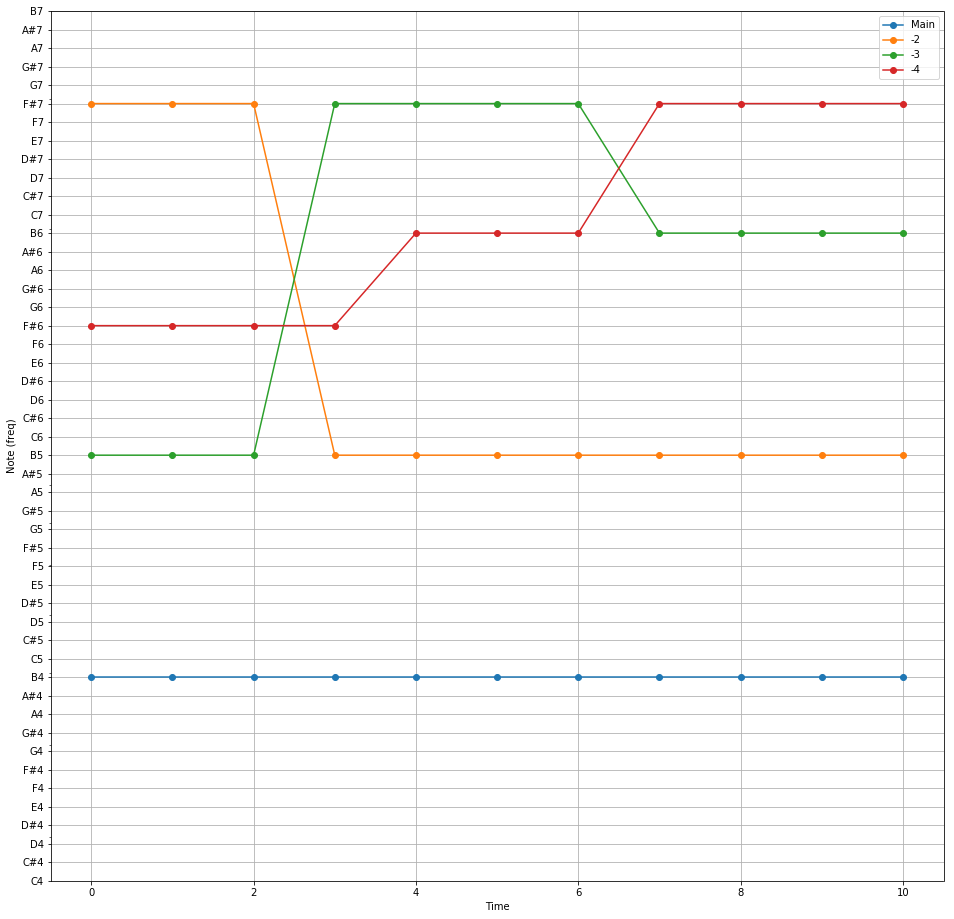

In [28]:
plt.figure(figsize=(16,16))
plt.plot(nf_guitar[corr_guitar.argmax(axis=0)][1:-2], 'o-', label='Main')
# plt.plot(nf_guitar[argsort_guitar2[-1]][1:-2], 'o-', label='-1')
plt.plot(nf_guitar[argsort_guitar2[-2]][1:-2], 'o-', label='-2')
plt.plot(nf_guitar[argsort_guitar2[-3]][1:-2], 'o-', label='-3')
plt.plot(nf_guitar[argsort_guitar2[-4]][1:-2], 'o-', label='-4')
# plt.plot(nf_guitar[argsort_guitar2[-5]][1:-2], 'o-', label='-5')
# plt.plot(nf_guitar[argsort_guitar2[-6]][1:-2], 'o-', label='-6')
# plt.plot(nf_guitar[argsort_guitar2[-7]][1:-2], 'o-', label='-7')

plt.legend()
plt.gca().set_yscale("log")
plt.yticks(util.frequencies('C4', 'C8'),
           util.note_names('C4', 'C8'))
# plt.xlim(1,11)
plt.xlabel("Time")
plt.ylabel('Note (freq)')
plt.gca().grid(True)
plt.gca().set_aspect('auto')

Text(0.5,0,'Time')

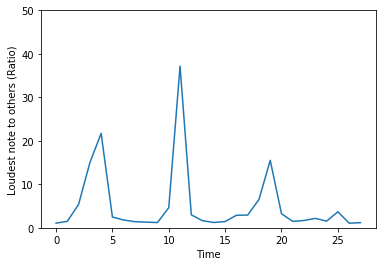

In [29]:
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-2][1:-2], 1)])
plt.ylim(0, 50)
plt.ylabel("Loudest note to others (Ratio)")
plt.xlabel("Time")

Text(0.5,0,'Time')

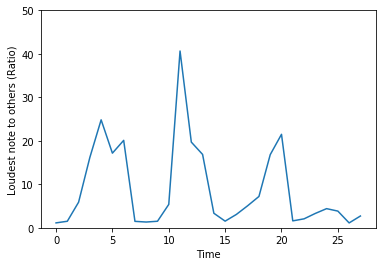

In [30]:
argsort_piano2 = np.argsort(corr_piano, axis=0)
plt.plot(corr_piano.max(axis=0)[1:-2] / [corr_piano[x,i] for i,x in enumerate(argsort_piano2[-3][1:-2], 1)])
plt.ylim(0, 50)
plt.ylabel("Loudest note to others (Ratio)")
plt.xlabel("Time")

(array([4., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 16261.44792564,  32116.67942274,  47971.91091983,  63827.14241693,
         79682.37391403,  95537.60541113, 111392.83690823, 127248.06840533,
        143103.29990243, 158958.53139953, 174813.76289663, 190668.99439373,
        206524.22589083, 222379.45738793, 238234.68888503, 254089.92038213,
        269945.15187922, 285800.38337632, 301655.61487342, 317510.84637052,
        333366.07786762, 349221.30936472, 365076.54086182, 380931.77235892,
        396787.00385602, 412642.23535312]),
 <a list of 25 Patch objects>)

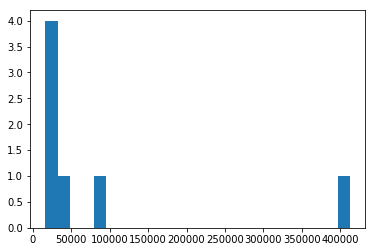

In [31]:
plt.hist(spectrogram_guitar[:,4][spectrogram_guitar[:,4]>1.6e04], 25)

In [ ]:
plt.hist(spectrogram_guitar[:,4][spectrogram_guitar[:,4]>1.6e04], 25)

In [38]:
spectrogram_guitar.shape

(8193, 14)

In [39]:
corr_guitar.shape

(94, 14)

(array([3., 0., 2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 1.]),
 array([ 90843.9722205 , 121972.98129178, 153101.99036306, 184230.99943434,
        215360.00850562, 246489.0175769 , 277618.02664818, 308747.03571946,
        339876.04479074, 371005.05386202, 402134.0629333 , 433263.07200458,
        464392.08107586, 495521.09014714, 526650.09921842, 557779.1082897 ,
        588908.11736098, 620037.12643226, 651166.13550354, 682295.14457482,
        713424.1536461 , 744553.16271738, 775682.17178866, 806811.18085994,
        837940.18993122, 869069.1990025 ]),
 <a list of 25 Patch objects>)

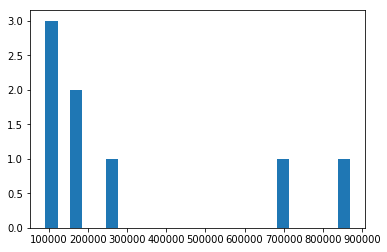

In [49]:
max_piano = spectrogram_piano[:,0].max()
plt.hist(spectrogram_piano[:,0][spectrogram_piano[:,0]>max_piano/10], 25)

(array([3., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 17056.86697007,  32880.28170539,  48703.69644071,  64527.11117604,
         80350.52591136,  96173.94064668, 111997.355382  , 127820.77011732,
        143644.18485264, 159467.59958797, 175291.01432329, 191114.42905861,
        206937.84379393, 222761.25852925, 238584.67326458, 254408.0879999 ,
        270231.50273522, 286054.91747054, 301878.33220586, 317701.74694119,
        333525.16167651, 349348.57641183, 365171.99114715, 380995.40588247,
        396818.8206178 , 412642.23535312]),
 <a list of 25 Patch objects>)

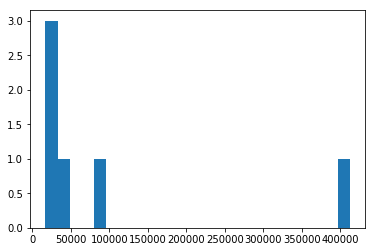

In [58]:
max_guitar = spectrogram_guitar[:,4].max()
plt.hist(spectrogram_guitar[:,4][spectrogram_guitar[:,4]>max_guitar/25], 25)

(array([5., 2., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 112393.66591409,  163507.56543177,  214621.46494946,
         265735.36446715,  316849.26398484,  367963.16350253,
         419077.06302021,  470190.9625379 ,  521304.86205559,
         572418.76157328,  623532.66109097,  674646.56060865,
         725760.46012634,  776874.35964403,  827988.25916172,
         879102.15867941,  930216.0581971 ,  981329.95771478,
        1032443.85723247, 1083557.75675016, 1134671.65626785,
        1185785.55578554, 1236899.45530322, 1288013.35482091,
        1339127.2543386 , 1390241.15385629]),
 <a list of 25 Patch objects>)

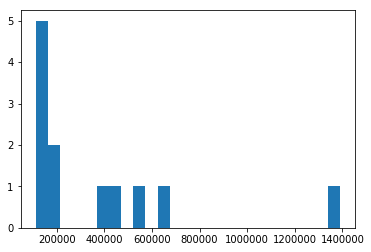

In [61]:
max_chords = spectrogram_chords[:,4].max()
plt.hist(spectrogram_chords[:,4][spectrogram_chords[:,4]>max_chords/15], 25)

In [68]:
max_guitar = spectrogram_guitar[:,4].max()
# plt.hist(spectrogram_guitar[:,4][spectrogram_guitar[:,4]>max_guitar/25], 25)

In [67]:
max_index = np.where(spectrogram_guitar==max_guitar)

In [69]:
max_index

(array([186]), array([4]))

In [70]:
spectrogram_guitar[max_index[0]]

array([[1.80793080e-02, 3.37505898e+05, 4.51755874e+05, 4.21197575e+05,
        4.12642235e+05, 4.00032356e+05, 4.10034964e+05, 4.10776085e+05,
        4.16515338e+05, 4.10911899e+05, 4.17927253e+05, 8.70364578e+04,
        8.55491923e-03, 1.07874846e-02]])

In [71]:
spectrogram_guitar[:,max_index[1]]

array([[6.38685980e-01],
       [2.21940826e+01],
       [3.01187474e+01],
       ...,
       [2.37431806e-04],
       [6.49414133e-06],
       [9.53160236e-05]])

In [86]:
max_guitar = spectrogram_guitar[:,0].max()
max_index = np.where(spectrogram_guitar==max_guitar)
loud_freq = freq_guitar[max_index[0]] # Loudest Frequency
harm_freq = loud_freq*2
harm_loc = np.where(freq_guitar==harm_freq)
harm_loud = spectrogram_guitar[harm_loc, max_index[1]]
loud_freq / harm_loud

array([[50.80540684]])

In [104]:
print('Ratios between loudest and 1st harmonic ')
total_ratios = []
for i in range(spectrogram_guitar.shape[1]):
    harm_ratios=[]
    print('Time step %d'%(i))
    max_guitar = spectrogram_guitar[:,i].max()
    max_index = np.where(spectrogram_guitar==max_guitar)
    loud_freq = freq_guitar[max_index[0]] # Loudest Frequency
    for j in range(2, 5):
        harm_freq = loud_freq*j
        harm_loc = np.where(freq_guitar==harm_freq)
        harm_loud = spectrogram_guitar[harm_loc, max_index[1]]
        rat = (loud_freq / harm_loud)[0][0]
        harm_ratios.append(rat)
        print(rat)
    total_ratios.append(harm_ratios)
    

Ratios between loudest and 1st harmonic 
Time step 0
50.80540683539549
57.29107606419269
121.15202569213642
Time step 1
0.016779865197456546
0.015808258716388617
0.08744590465074764
Time step 2
0.017964555737625183
0.02291943147443915
0.1168842203788005
Time step 3
0.02297775013287799
0.02979000253358985
0.06729744811761323
Time step 4
0.02057298269198948
0.02935163729275536
0.04126362776409271
Time step 5
0.022303893568419823
0.041065273724829765
0.04065053345287132
Time step 6
0.018786491193313975
0.04175031198937958
0.025100580348227406
Time step 7
0.019536352886457484
0.05852396112851976
0.023812585774787245
Time step 8
0.017965880064635644
0.06471472483040673
0.02130352322564574
Time step 9
0.01782154179495588
0.06099803788087545
0.018019638373505054
Time step 10
0.01637024589664607
0.06698833545832444
0.024962144715205796
Time step 11
0.15722292010973893
0.3335255023908674
0.08021475025087549
Time step 12
0.4604196371248692
0.5360541278526569
7.286625625982079
Time step 13
1.0834

In [105]:
total_ratios

[[50.80540683539549, 57.29107606419269, 121.15202569213642],
 [0.016779865197456546, 0.015808258716388617, 0.08744590465074764],
 [0.017964555737625183, 0.02291943147443915, 0.1168842203788005],
 [0.02297775013287799, 0.02979000253358985, 0.06729744811761323],
 [0.02057298269198948, 0.02935163729275536, 0.04126362776409271],
 [0.022303893568419823, 0.041065273724829765, 0.04065053345287132],
 [0.018786491193313975, 0.04175031198937958, 0.025100580348227406],
 [0.019536352886457484, 0.05852396112851976, 0.023812585774787245],
 [0.017965880064635644, 0.06471472483040673, 0.02130352322564574],
 [0.01782154179495588, 0.06099803788087545, 0.018019638373505054],
 [0.01637024589664607, 0.06698833545832444, 0.024962144715205796],
 [0.15722292010973893, 0.3335255023908674, 0.08021475025087549],
 [0.4604196371248692, 0.5360541278526569, 7.286625625982079],
 [1.0834493734824848, 1.1026684659668315, 0.9842245015177695]]

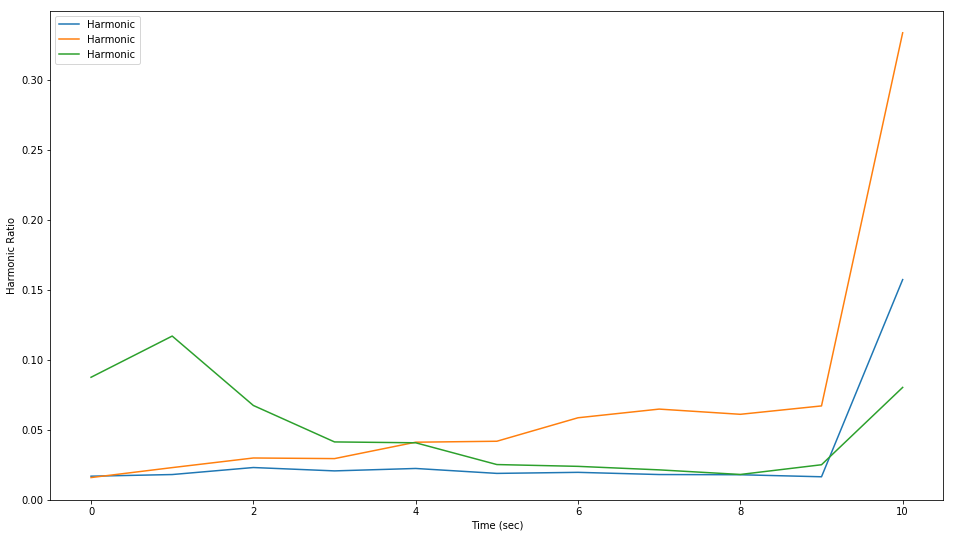

In [132]:
plt.figure(figsize=(16,9))
plt.ylabel('Harmonic Ratio')
plt.xlabel('Time (sec)')
# plt.ylim(0,5)
plt.plot(total_ratios[1:-2], label='Harmonic')
plt.legend()

In [138]:
print('Ratios between loudest and 1st harmonic ')
total_ratios_piano = []
for i in range(spectrogram_piano.shape[1]):
    harm_ratios_piano=[]
    print('Time step %d'%(i))
    max_piano = spectrogram_piano[:,i].max()
    max_index_piano = np.where(spectrogram_piano==max_piano)
    loud_freq_piano = freq_piano[max_index_piano[0]] # Loudest Frequency
    for j in range(2, 5):
        harm_freq_piano = loud_freq*j
        harm_loc_piano = np.where(freq_piano==harm_freq_piano)
        harm_loud_piano = spectrogram_piano[harm_loc_piano, max_index_piano[1]]
        rat_piano = (loud_freq_piano / harm_loud_piano)[0][0]
        harm_ratios_piano.append(rat_piano)
        print(rat_piano)
    total_ratios_piano.append(harm_ratios_piano)

Ratios between loudest and 1st harmonic 
Time step 0
84.08412932915222
32.03373756519197
190.38961697614877
Time step 1
870.7427753196608
1780.294468435977
175.25494722438438
Time step 2
6493.089429814114
5733.429137706657
45.99232211459184
Time step 3
4496.235285180652
1967.1165441053986
224.0022615267497
Time step 4
84232.1488323392
7587.780363780111
671.8322580112641
Time step 5
44635.81921767134
38766.56070619044
10533.362202139024
Time step 6
8216.587400078599
10198.378741395034
3299.573060037307
Time step 7
4634.846277779516
12737.406955750119
1137.170366776593
Time step 8
7761.575386517881
78.07375175821265
124.84607271367
Time step 9
4203.023881433566
259.71476889040906
581.1034341098554
Time step 10
7892.247985822314
1976.6118888836238
112.7492402840112
Time step 11
29743.267477733767
2931.248002028799
1162.4930257387161
Time step 12
128.71776717116316
179.35702958092745
1133.0027201681132
Time step 13
1415.2646846689504
12577.970570465608
880.9578103891741
Time step 14
2261.9

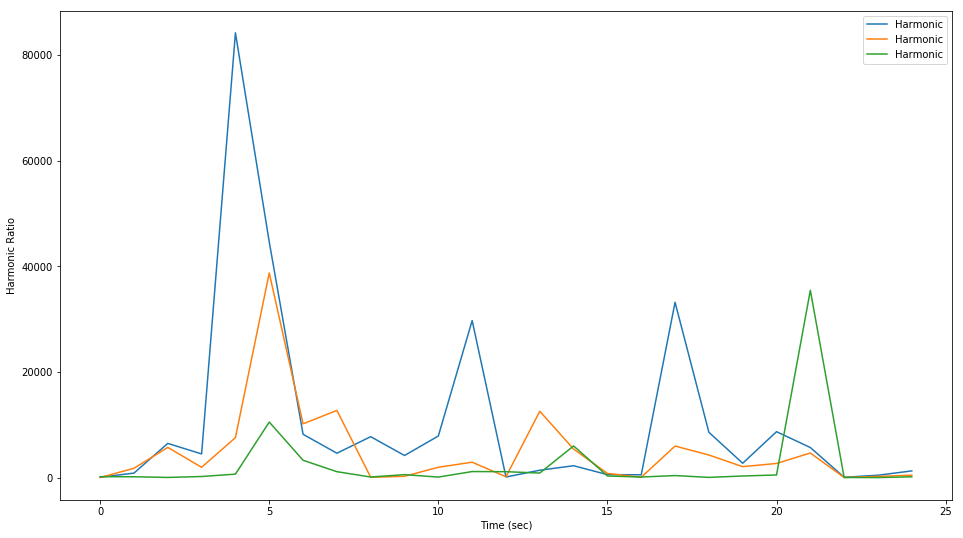

In [139]:
plt.figure(figsize=(16,9))
plt.ylabel('Harmonic Ratio')
plt.xlabel('Time (sec)')
plt.plot(total_ratios_piano[:-6], label='Harmonic')
plt.legend()